In [1]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
path = "../sample_COPD_dataset.csv"
df = pd.read_csv(path)
df.head()

,Age,Gender,Location,Income Level,Education Level,Occupation,Biomass Fuel,Tobacco Smoking,Outdoor Air Poll,Occupational Expos,Family History,Respiratory Infection,Health Insurance,COPD Diagnosis,COPD Severity
0,66,Male,Rural,Middle,Primary,Farmer,0,1,1,2,1,1,Yes,Diagnosed,Mild
1,40,Male,Urban,High,High,Other,0,1,2,3,1,3,Yes,Undiagnosed,Severe
2,52,Female,Urban,Middle,Secondary,Other,1,1,2,3,0,3,No,Undiagnosed,Severe
3,79,Female,Urban,Middle,Primary,Other,0,0,3,2,0,3,Yes,Diagnosed,Mild
4,54,Male,Rural,Low,Secondary,Farmer,0,0,2,3,1,1,Yes,Diagnosed,Severe


In [3]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    50000 non-null  int64 
 1   Gender                 50000 non-null  object
 2   Location               50000 non-null  object
 3   Income Level           50000 non-null  object
 4   Education Level        50000 non-null  object
 5   Occupation             50000 non-null  object
 6   Biomass Fuel           50000 non-null  int64 
 7   Tobacco Smoking        50000 non-null  int64 
 8   Outdoor Air Poll       50000 non-null  int64 
 9   Occupational Expos     50000 non-null  int64 
 10  Family History         50000 non-null  int64 
 11  Respiratory Infection  50000 non-null  int64 
 12  Health Insurance       50000 non-null  object
 13  COPD Diagnosis         50000 non-null  object
 14  COPD Severity          50000 non-null  object
dtypes: int64(7), object

# Univariate Analysis

c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


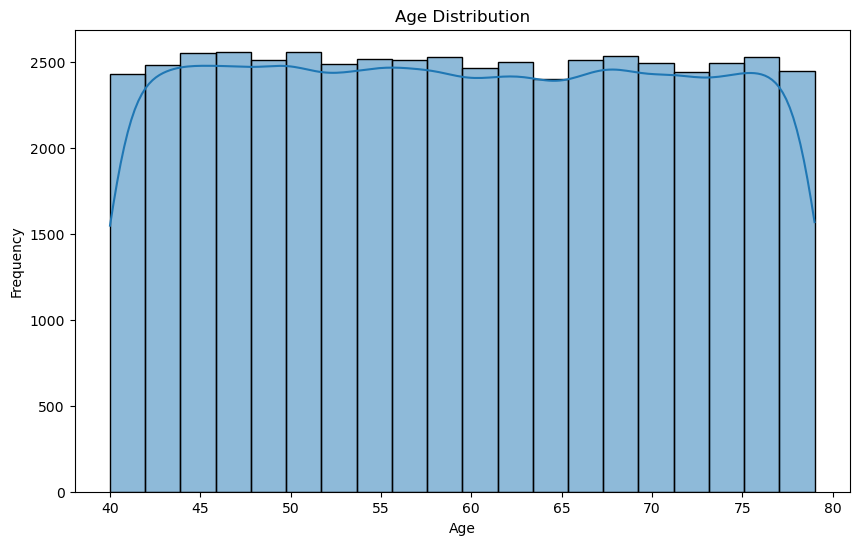

In [4]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

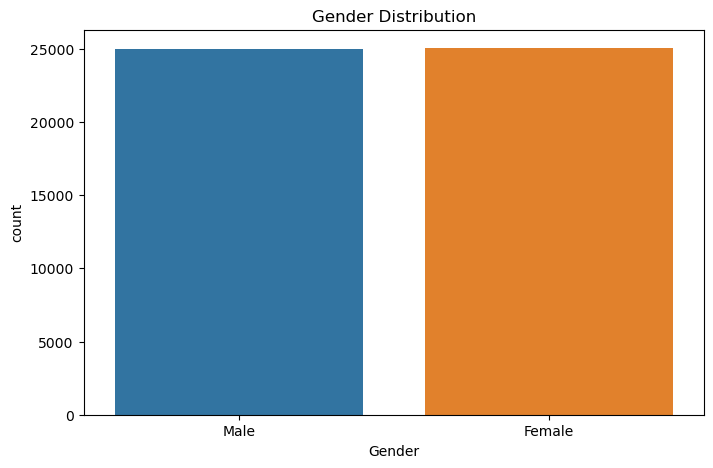

In [5]:
# Gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

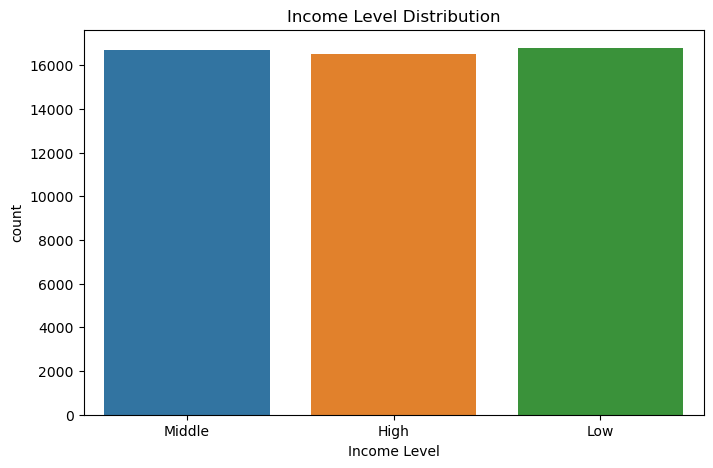

In [6]:
# Income level distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Income Level', data=df)
plt.title('Income Level Distribution')
plt.show()

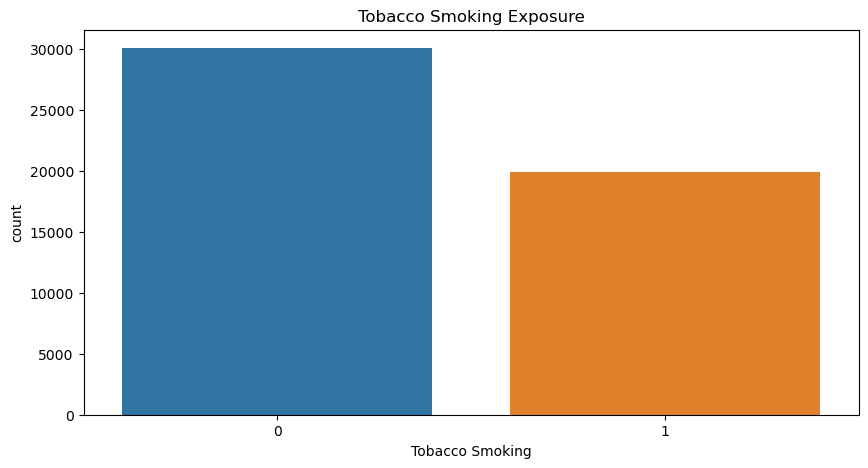

In [7]:
# Tobacco Smoking and Biomass Fuel exposure
plt.figure(figsize=(10, 5))
sns.countplot(x='Tobacco Smoking', data=df)
plt.title('Tobacco Smoking Exposure')
plt.show()

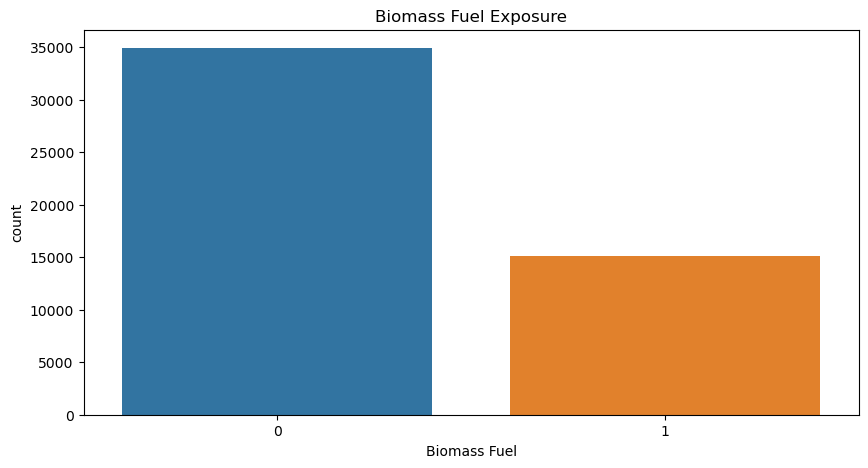

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Biomass Fuel', data=df)
plt.title('Biomass Fuel Exposure')
plt.show()

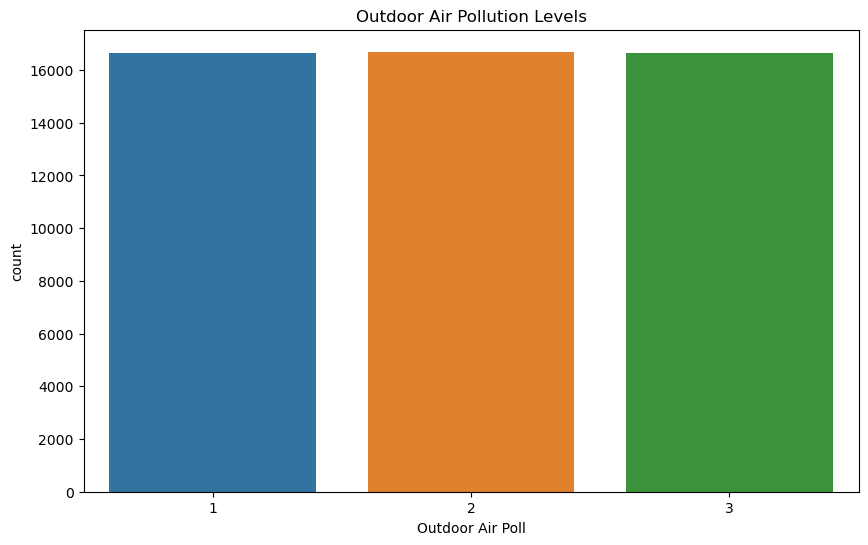

In [9]:
# Outdoor Air Pollution distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Outdoor Air Poll', data=df)
plt.title('Outdoor Air Pollution Levels')
plt.show()

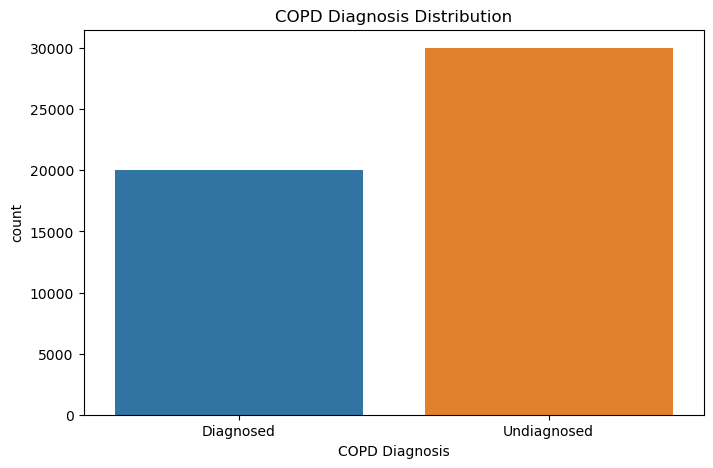

In [10]:
# COPD Diagnosis Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='COPD Diagnosis', data=df)
plt.title('COPD Diagnosis Distribution')
plt.show()

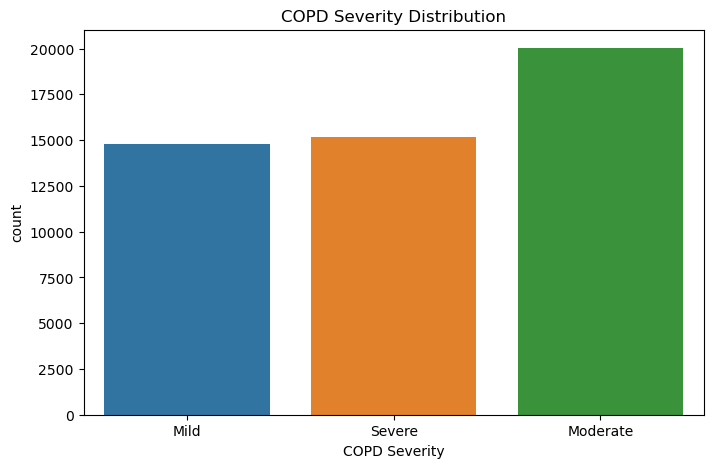

In [11]:
# COPD Severity Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='COPD Severity', data=df)
plt.title('COPD Severity Distribution')
plt.show()

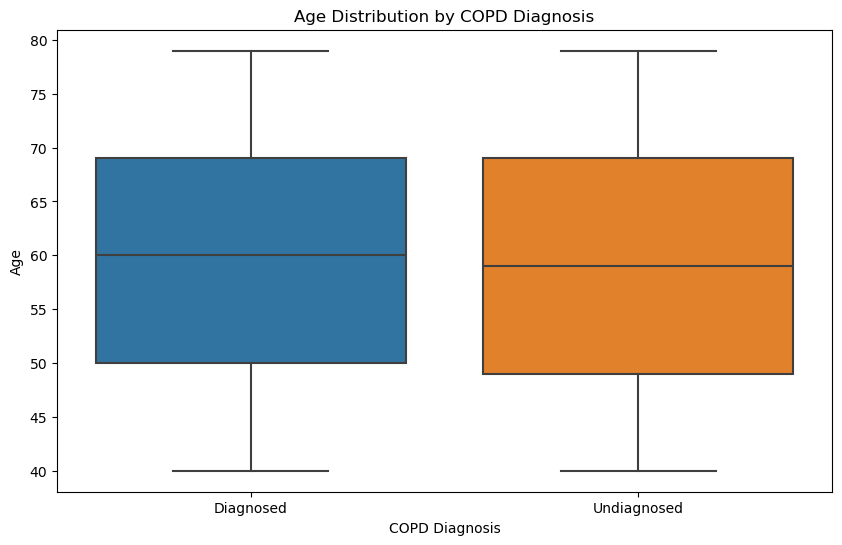

In [12]:
# Age vs COPD Diagnosis
plt.figure(figsize=(10, 6))
sns.boxplot(x='COPD Diagnosis', y='Age', data=df)
plt.title('Age Distribution by COPD Diagnosis')
plt.show()


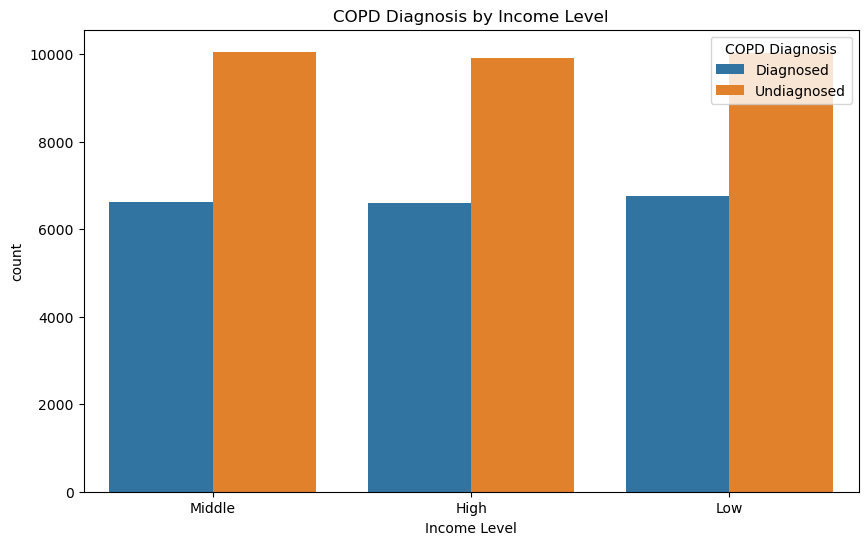

In [13]:
# Income Level vs COPD Diagnosis
plt.figure(figsize=(10, 6))
sns.countplot(x='Income Level', hue='COPD Diagnosis', data=df)
plt.title('COPD Diagnosis by Income Level')
plt.show()

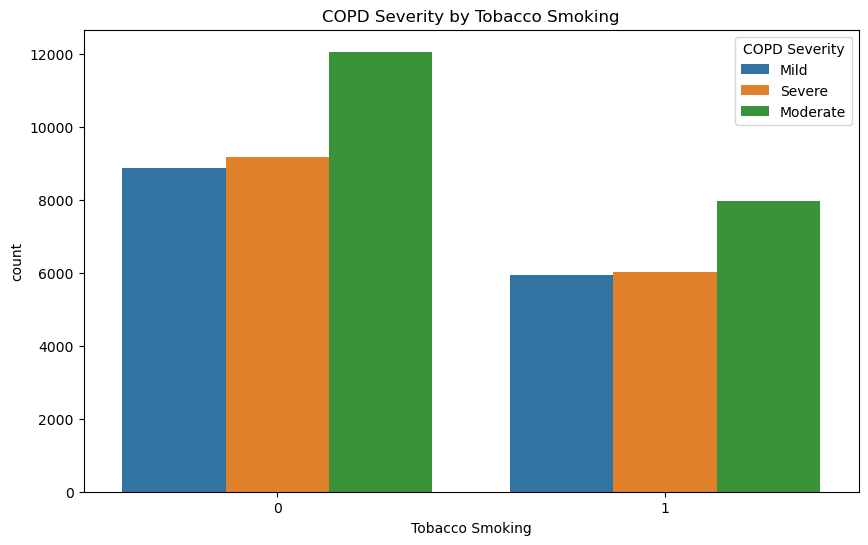

In [14]:
# Tobacco Smoking vs COPD Severity
plt.figure(figsize=(10, 6))
sns.countplot(x='Tobacco Smoking', hue='COPD Severity', data=df)
plt.title('COPD Severity by Tobacco Smoking')
plt.show()

In [15]:
# Convert categorical variables to numeric for correlation
correlation_data = df.copy()
correlation_data['Gender'] = correlation_data['Gender'].map({'Male': 1, 'Female': 0})
correlation_data['COPD Diagnosis'] = correlation_data['COPD Diagnosis'].map({'Diagnosed': 1, 'Undiagnosed': 0})


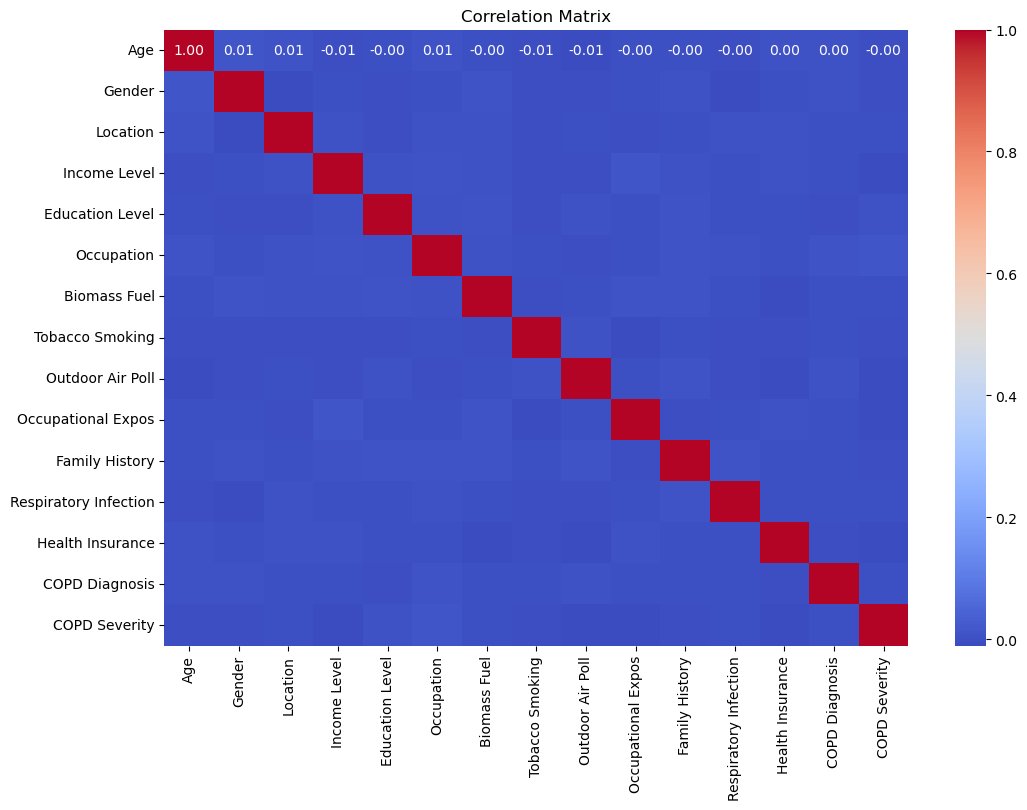

In [16]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# List of categorical columns to convert
categorical_columns = [
    'Location', 
    'Income Level', 
    'Education Level', 
    'Occupation', 
    'COPD Diagnosis', 
    'COPD Severity', 
    'Health Insurance'
]

# Convert categorical variables to numeric
for column in categorical_columns:
    correlation_data[column] = le.fit_transform(correlation_data[column])

# Now compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()